In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools

def generate_unique_pairs(container: list[str], ignore: list[tuple[str, str]] = None) -> list[str]:
    if ignore == None:
        ignore = list()
    upairs = list()
    for (a, b) in itertools.permutations(container, 2):
        if ((b, a) not in upairs) & ((a, b) not in ignore) & ((b, a) not in ignore):
            upairs.append((a, b))
    return upairs

# ***Degree and closeness centrality***
-----------------------------

In [35]:
# Node importance

# in the Karate club network of 34 people which are the 5 most important nodes?
# there are many ways to find this!

# one way is to think is in terms of degrees
# nodes that have higher degrees are generally more important than nodes witl lower degrees.

karate = nx.karate_club_graph()
karate = nx.convert_node_labels_to_integers(karate, first_label = 1)

In [36]:
# another metric to measure importance is by means of proximity to other nodes.

# another metric is the fraction of shortest paths that pass through the given node.

## ***Network centrality***

**Centrality measures help us identify the most important nodes in a network.**

- Influential nodes in a social network.
- Nodes that disseminate information to many other nodes or prevent epidemics.
- Hubs in a transportation network.
- Important pages on the Web.
- Nodes that prevent the network from breaking up.(if these are removed, the network may collapse)

## ***Centrality measures***
- Degree centrality
- Closeness centrality
- Betweenness centrality
- Load centrality
- Page rank
- Katz centrality
- Percolation centrality

In [37]:
# degree centrality uses the degree of nodes as the metric of importance
# the higher the connections a node has, the more important it becomes.

# if the graph is an undirected network, one can simply use the degree
# if it is a directed graph one has to decide whether to use the in degrees (incoming connections) or out degrees (outgoing connections)
# or a combination of both.

## ***Degree centrality of node v is: $C_{deg}(v) = \frac{d_{v}}{|N| - 1}$***
Where N is the total number of nodes in the graph.

So, if a node is connected to every single node in the network, it will have a degree centrality of 1.
If it is an isolated node, it will have a centrality of 0.
So, for a given node its degree centrality will range from 0 to 1.

In [38]:
kdegrees = {node: karate.degree(node) for node in karate.nodes()}
print(kdegrees)

{1: 16, 2: 9, 3: 10, 4: 6, 5: 3, 6: 4, 7: 4, 8: 4, 9: 5, 10: 2, 11: 3, 12: 1, 13: 2, 14: 5, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 3, 21: 2, 22: 2, 23: 2, 24: 5, 25: 3, 26: 3, 27: 2, 28: 4, 29: 3, 30: 4, 31: 4, 32: 6, 33: 12, 34: 17}


In [39]:
sorted(kdegrees, key = lambda key: kdegrees.get(key), reverse = True)[:5]

[34, 1, 33, 3, 2]

In [40]:
nnodes_ = len(karate.nodes())
deg_centrality = {node: karate.degree(node) / (nnodes_ - 1) for node in karate.nodes()}

In [41]:
print(deg_centrality)

{1: 0.48484848484848486, 2: 0.2727272727272727, 3: 0.30303030303030304, 4: 0.18181818181818182, 5: 0.09090909090909091, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.12121212121212122, 9: 0.15151515151515152, 10: 0.06060606060606061, 11: 0.09090909090909091, 12: 0.030303030303030304, 13: 0.06060606060606061, 14: 0.15151515151515152, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.06060606060606061, 20: 0.09090909090909091, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.06060606060606061, 24: 0.15151515151515152, 25: 0.09090909090909091, 26: 0.09090909090909091, 27: 0.06060606060606061, 28: 0.12121212121212122, 29: 0.09090909090909091, 30: 0.12121212121212122, 31: 0.12121212121212122, 32: 0.18181818181818182, 33: 0.36363636363636365, 34: 0.5151515151515151}


In [42]:
print(nx.degree_centrality(karate))

{1: 0.48484848484848486, 2: 0.2727272727272727, 3: 0.30303030303030304, 4: 0.18181818181818182, 5: 0.09090909090909091, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.12121212121212122, 9: 0.15151515151515152, 10: 0.06060606060606061, 11: 0.09090909090909091, 12: 0.030303030303030304, 13: 0.06060606060606061, 14: 0.15151515151515152, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.06060606060606061, 20: 0.09090909090909091, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.06060606060606061, 24: 0.15151515151515152, 25: 0.09090909090909091, 26: 0.09090909090909091, 27: 0.06060606060606061, 28: 0.12121212121212122, 29: 0.09090909090909091, 30: 0.12121212121212122, 31: 0.12121212121212122, 32: 0.18181818181818182, 33: 0.36363636363636365, 34: 0.5151515151515151}


## ***Degree centrality of directed networks:***
# ***In-degree centrality:  $C_{indeg}(v) = \frac{d^{in}_{v}}{|N| - 1}$***
**Only the incoming edges are considered.**

# ***Out-degree centrality:  $C_{outdeg}(v) = \frac{d^{out}_{v}}{|N| - 1}$***
**Here, only the noutgoing edges are considered.**

# ***Closeness centrality***
---------------------

In [43]:
# This assumes that nodes that are shortest distance away from all the other nodes are more important.
# We have to compute the average length of shortest paths from a given node to all the other nodes in the network to get the closeness centrality 
# of one node.
# This has to be repeated for all nodes in the network

# ***Closeness centrality:  $C_{close}(v) = \frac{|N| - 1}{\sum_{u \in {N/(v)}}{d(v, u)}}$***
**Where, `v - the node of interest`, `u - an iterator for all the other nodes that are in the network`, `d(v, u) - length of the shortest path from v to u.`**

In [44]:
kccentrality = nx.closeness_centrality(karate)

In [45]:
sorted(kccentrality.items(), key = lambda x: x[1], reverse = True)

[(1, 0.5689655172413793),
 (3, 0.559322033898305),
 (34, 0.55),
 (32, 0.5409836065573771),
 (9, 0.515625),
 (14, 0.515625),
 (33, 0.515625),
 (20, 0.5),
 (2, 0.4852941176470588),
 (4, 0.4647887323943662),
 (28, 0.4583333333333333),
 (31, 0.4583333333333333),
 (29, 0.4520547945205479),
 (8, 0.44),
 (10, 0.4342105263157895),
 (24, 0.39285714285714285),
 (6, 0.38372093023255816),
 (7, 0.38372093023255816),
 (30, 0.38372093023255816),
 (5, 0.3793103448275862),
 (11, 0.3793103448275862),
 (18, 0.375),
 (22, 0.375),
 (25, 0.375),
 (26, 0.375),
 (13, 0.3707865168539326),
 (15, 0.3707865168539326),
 (16, 0.3707865168539326),
 (19, 0.3707865168539326),
 (21, 0.3707865168539326),
 (23, 0.3707865168539326),
 (12, 0.36666666666666664),
 (27, 0.3626373626373626),
 (17, 0.28448275862068967)]

In [46]:
shortest_path_lens_node_1 = nx.shortest_path_length(karate, 1)

sum(shortest_path_lens_node_1.values())

58

In [47]:
karate.number_of_nodes() - 1

33

In [48]:
(karate.number_of_nodes() - 1) / sum(shortest_path_lens_node_1.values())

0.5689655172413793

In [49]:
nnodes = karate.number_of_nodes()

for node in karate.nodes():
    print(node, " : ", (nnodes - 1) / (sum(nx.shortest_path_length(karate, node).values())))

1  :  0.5689655172413793
2  :  0.4852941176470588
3  :  0.559322033898305
4  :  0.4647887323943662
5  :  0.3793103448275862
6  :  0.38372093023255816
7  :  0.38372093023255816
8  :  0.44
9  :  0.515625
10  :  0.4342105263157895
11  :  0.3793103448275862
12  :  0.36666666666666664
13  :  0.3707865168539326
14  :  0.515625
15  :  0.3707865168539326
16  :  0.3707865168539326
17  :  0.28448275862068967
18  :  0.375
19  :  0.3707865168539326
20  :  0.5
21  :  0.3707865168539326
22  :  0.375
23  :  0.3707865168539326
24  :  0.39285714285714285
25  :  0.375
26  :  0.375
27  :  0.3626373626373626
28  :  0.4583333333333333
29  :  0.4520547945205479
30  :  0.38372093023255816
31  :  0.4583333333333333
32  :  0.5409836065573771
33  :  0.515625
34  :  0.55


In [50]:
# Here we make an implicit assumption that all nodes can actually reach all the other nodes.
# This is not always the case, particulary in directed networks or an undirected metwork with multiple connected components.

## ***Disconnected nodes***

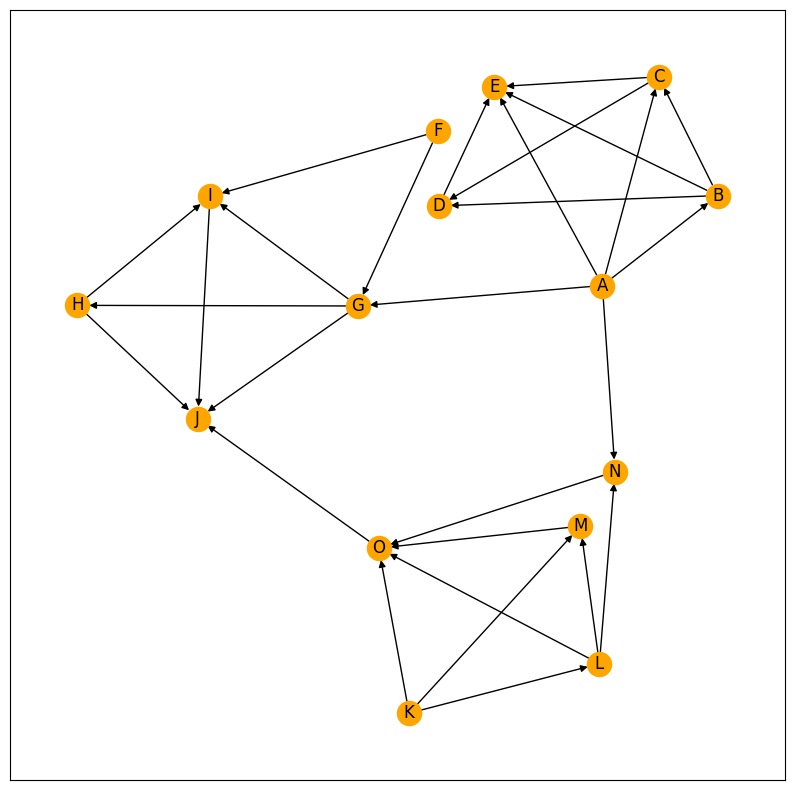

In [67]:
plt.rcParams["figure.figsize"] = 10, 10
digraph = nx.DiGraph()
edges = generate_unique_pairs(["A", "B", "C", "D", "E"], [("A", "D")]) + \
        generate_unique_pairs(["F", "G", "H", "I", "J"], [("H", "F"), ("J", "F")]) + \
        generate_unique_pairs(["K", "L", "M", "N", "O"], [("M", "N"), ("N", "K")]) + [("A", "G"), ("A", "N"), ("O", "J")]
digraph.add_edges_from(edges)
pos = nx.kamada_kawai_layout(digraph)
nx.draw_networkx(digraph, pos = pos, node_color = "orange")

In [52]:
# What is the closeness centrality of O?

# R(O) is the set of nodes O can reach.
# We define the cc as the number of nodes that O can reach divided by the sum of shortest path lengths from O to all nodes O can reach.

# ***Method 1 - $C_{close}(O) = \frac{|R(O)|}{\sum_{u \in R(O)}{d(O, u)}}$***

In [56]:
# Where R(O) is the set of nodes O can reach.
# So, for O, cc will be: 
# R(O) = 1 (i.e J)
# shortest path length is 1

# so cc of O is 1/1 = 1.

# However this seems unintuitive for a node with one outgoing edge to have the highest closeness centrality.

In [57]:
# In method 2, we only consider the nodes O can reach but then normalize by the nodes O can actually reach.

# ***Method 2 - $C_{close}(O) = [\frac{|R(O)|}{|N - 1|}]\frac{|R(O)|}{\sum_{u \in R(O)}{d(O, u)}}$***

In [61]:
# here the answer from method 1 is multiplied by (number of nodes O can reach / total number of nodes minus one)

In [62]:
digraph.number_of_nodes()

15

In [66]:
# method 2 - 1 / 15
1 / (15 - 1)

0.07142857142857142

***Method 2 does not change the definition of closeness centrality.      
In an undirected connected graph, or in a directed strongly connected graph; R(O) will be equal to N - 1. Any given node will be able to reach all the other nodes. So, this modified equation has no sideeffect at all, as the prefixed part will evaluate to 1.***

In [64]:
nx.closeness_centrality(digraph, wf_improved = False)

{'A': 0.0,
 'B': 1.0,
 'C': 1.0,
 'E': 1.0,
 'D': 0.75,
 'F': 0.0,
 'G': 1.0,
 'I': 0.8,
 'H': 0.6,
 'J': 0.625,
 'K': 0.0,
 'L': 1.0,
 'M': 1.0,
 'O': 0.8333333333333334,
 'N': 0.75}

In [65]:
nx.closeness_centrality(digraph, wf_improved = True)

{'A': 0.0,
 'B': 0.07142857142857142,
 'C': 0.14285714285714285,
 'E': 0.2857142857142857,
 'D': 0.1607142857142857,
 'F': 0.0,
 'G': 0.14285714285714285,
 'I': 0.22857142857142856,
 'H': 0.12857142857142856,
 'J': 0.44642857142857145,
 'K': 0.0,
 'L': 0.07142857142857142,
 'M': 0.14285714285714285,
 'O': 0.2976190476190476,
 'N': 0.1607142857142857}